In [2]:
import numpy as np

from PIL import Image
image = Image.open('5x5.png')
image.show()

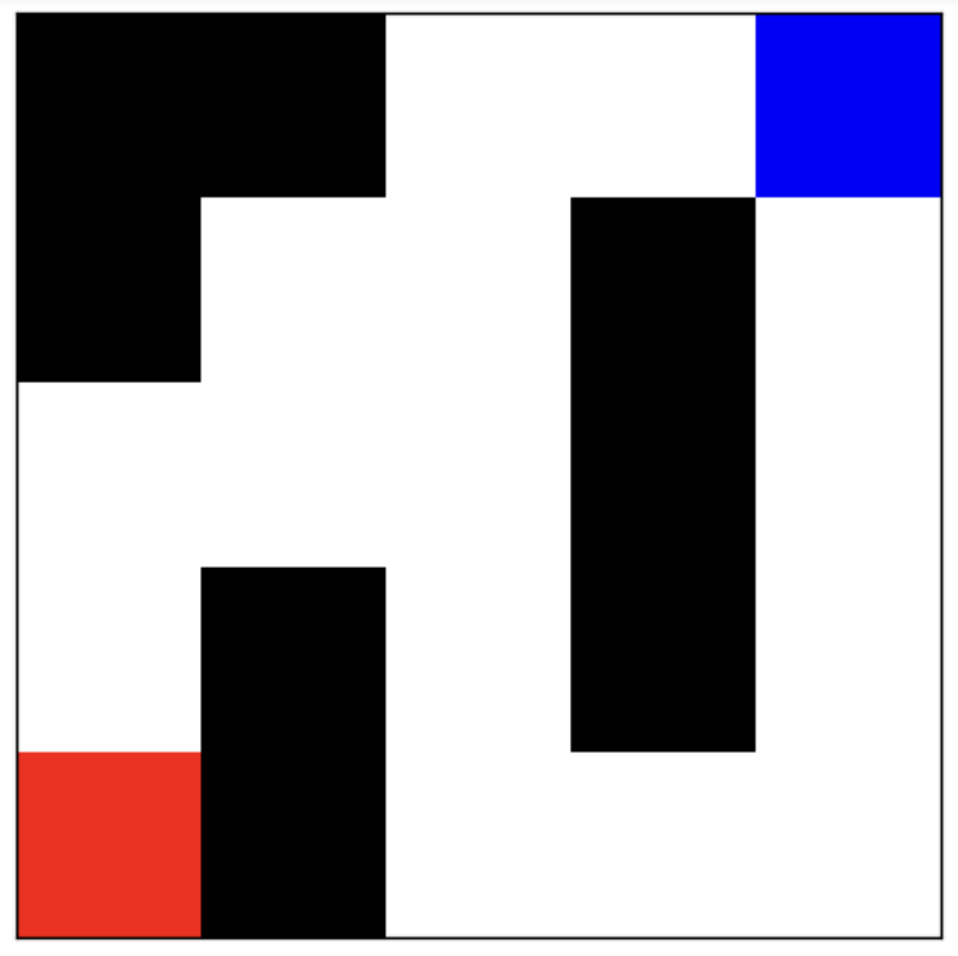

In [2]:
image

In [15]:
maze = ([0,0,1,1,2],
        [0,1,1,0,1],
        [1,1,1,0,1],
        [0,1,0,1,0],
        [2,0,1,1,1])



In [25]:
start = maze[0][4]
end = maze[4][0]
agent = 100

(4, 4)

In [61]:
naive_solution()


NameError: name 'wall' is not defined

In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt



counter = 0
BOARD_ROWS = 5
BOARD_COLS = 5


START = (0, 4)
WIN_STATE = (4,0 )
WALL_STATE = [(0,0),(0,1),(1,0),(1,3),(2,3),(3,1),(3,3),(4,1)]


class State:
    def __init__(self, state=START):
  
        self.state = state
        self.isEnd = False        

    def getReward(self):

        for i in HOLE_STATE:
            if self.state == i:
                return -5
        if self.state == WIN_STATE:
            return 1
        
        else:
            return -1

    def isEndFunc(self):
        
        if (self.state == WIN_STATE):
            self.isEnd = True
            
        for i in HOLE_STATE:
            if self.state == i:
                self.isEnd = True

    def nxtPosition(self, action):     
        
        if action == 0:                
            nxtState = (self.state[0] - 1, self.state[1]) #up             
        elif action == 1:
            nxtState = (self.state[0] + 1, self.state[1]) #down
        elif action == 2:
            nxtState = (self.state[0], self.state[1] - 1) #left
        else:
            nxtState = (self.state[0], self.state[1] + 1) #right


        
        if (nxtState[0] >= 0) and (nxtState[0] <= 4):
            if (nxtState[1] >= 0) and (nxtState[1] <= 4):    
                                    
                    return nxtState 
             
        return self.state 



          
class Agent:

    def __init__(self):
         
        self.states = []
        self.actions = [0,1,2,3]    # up, down, left, right
        self.State = State()
        
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        self.isEnd = self.State.isEnd

        
        self.plot_reward = []
        
        
        self.Q = {}
        self.new_Q = {}
        
        self.rewards = 0
        
       
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                for k in range(len(self.actions)):
                    self.Q[(i, j, k)] =0
                    self.new_Q[(i, j, k)] = 0
        
        print(self.Q)
        
    

    
    def Action(self):
        
        rnd = random.random()
        
        mx_nxt_reward =-10
        action = None
        
         
        if(rnd >self.epsilon) :
            
            for k in self.actions:
                
                i,j = self.State.state
                
                nxt_reward = self.Q[(i,j, k)]
                
                if nxt_reward >= mx_nxt_reward:
                    action = k
                    mx_nxt_reward = nxt_reward
                    
        
        else:
            action = np.random.choice(self.actions)
        
        
        position = self.State.nxtPosition(action)
        return position,action
    
    
    def Q_Learning(self,episodes):
        x = 0
        while(x < episodes):
            
            if self.isEnd:
                
                reward = self.State.getReward()
                self.rewards += reward
                self.plot_reward.append(self.rewards)
                
                
                i,j = self.State.state
                for a in self.actions:
                    self.new_Q[(i,j,a)] = round(reward,3)
                    
                
                self.State = State()
                self.isEnd = self.State.isEnd
                
                
                self.rewards = 0
                x+=1
                
            else:
                
                mx_nxt_value = -10
                
                next_state, action = self.Action()
                i,j = self.State.state
                reward = self.State.getReward()
                
                self.rewards +=reward
                
         
               
                for a in self.actions:
                    nxtStateAction = (next_state[0], next_state[1], a)
                    q_value = (1-self.alpha)*self.Q[(i,j,action)] + self.alpha*(reward + self.gamma*self.Q[nxtStateAction])
                
                    #find largest Q value
                    if q_value >= mx_nxt_value:
                        mx_nxt_value = q_value
                
                #next state is now current state, check if end state
                self.State = State(state=next_state)
                self.State.isEndFunc()
                self.isEnd = self.State.isEnd
                
                #update Q values with max Q value for next state
                self.new_Q[(i,j,action)] = round(mx_nxt_value,3)
            
            #copy new Q values to Q table
            self.Q = self.new_Q.copy()
            counter += 1
        #print final Q table output
        print(self.Q)
        
        # New addition
        
    #plot the reward vs episodes
    def plot(self,episodes):
        
        plt.plot(self.plot_reward)
        plt.show()
        
        
    #iterate through the board and find largest Q value in each, print output
    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('-----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                mx_nxt_value = -10
                for a in self.actions:
                    nxt_value = self.Q[(i,j,a)]
                    if nxt_value >= mx_nxt_value:
                        mx_nxt_value = nxt_value
                out += str(mx_nxt_value).ljust(6) + ' | '
            print(out)
        print('-----------------------------------------------')
        
    
        
if __name__ == "__main__":
    #create agent for 10,000 episdoes implementing a Q-learning algorithm plot and show values.
    ag = Agent()
    episodes = 32
    ag.Q_Learning(episodes)
    ag.plot(episodes)
    ag.showValues()

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (0, 4, 0): 0, (0, 4, 1): 0, (0, 4, 2): 0, (0, 4, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (1, 4, 0): 0, (1, 4, 1): 0, (1, 4, 2): 0, (1, 4, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (2, 4, 0): 0, (2, 4, 1): 0, (2, 4, 2): 0, (2, 4, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2

UnboundLocalError: local variable 'counter' referenced before assignment

In [59]:
ag.Q_Learning(0)

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): -5, (0, 1, 1): -5, (0, 1, 2): -5, (0, 1, 3): -5, (0, 2, 0): -4.74, (0, 2, 1): -4.156, (0, 2, 2): -5.461, (0, 2, 3): -5.217, (0, 3, 0): -5.258, (0, 3, 1): -4.875, (0, 3, 2): -4.741, (0, 3, 3): -5.711, (0, 4, 0): -5.674, (0, 4, 1): -5.703, (0, 4, 2): -5.267, (0, 4, 3): -5.569, (1, 0, 0): -5, (1, 0, 1): -5, (1, 0, 2): -5, (1, 0, 3): -5, (1, 1, 0): -5.479, (1, 1, 1): -2.784, (1, 1, 2): -5.344, (1, 1, 3): -3.992, (1, 2, 0): -4.479, (1, 2, 1): -3.509, (1, 2, 2): -3.506, (1, 2, 3): -5.328, (1, 3, 0): -5, (1, 3, 1): -5, (1, 3, 2): -5, (1, 3, 3): -5, (1, 4, 0): -5.6, (1, 4, 1): -5.294, (1, 4, 2): -5.328, (1, 4, 3): -5.29, (2, 0, 0): -4.812, (2, 0, 1): -1.091, (2, 0, 2): -1.973, (2, 0, 3): -2.557, (2, 1, 0): -3.031, (2, 1, 1): -5.188, (2, 1, 2): -1.982, (2, 1, 3): -3.171, (2, 2, 0): -3.156, (2, 2, 1): -3.564, (2, 2, 2): -2.784, (2, 2, 3): -4.125, (2, 3, 0): -5, (2, 3, 1): -5, (2, 3, 2): -5, (2, 3, 3): -5, (2, 4, 0): -5.035, (2, 

In [ ]:
#https://github.com/ronanmmurphy/Q-Learning-Algorithm/blob/main/Q-Learning%20Algorithm.py

In [53]:
episodes = 100


value = ag.Q_Learning(100)
value.items()[-1]
    

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): -5, (0, 1, 1): -5, (0, 1, 2): -5, (0, 1, 3): -5, (0, 2, 0): -4.74, (0, 2, 1): -4.156, (0, 2, 2): -5.499, (0, 2, 3): -5.266, (0, 3, 0): -5.266, (0, 3, 1): -5.499, (0, 3, 2): -4.741, (0, 3, 3): -5.74, (0, 4, 0): -5.74, (0, 4, 1): -5.949, (0, 4, 2): -5.267, (0, 4, 3): -5.74, (1, 0, 0): -5, (1, 0, 1): -5, (1, 0, 2): -5, (1, 0, 3): -5, (1, 1, 0): -5.499, (1, 1, 1): -2.784, (1, 1, 2): -5.499, (1, 1, 3): -4.155, (1, 2, 0): -4.74, (1, 2, 1): -3.506, (1, 2, 2): -3.506, (1, 2, 3): -5.499, (1, 3, 0): -5, (1, 3, 1): -5, (1, 3, 2): -5, (1, 3, 3): -5, (1, 4, 0): -5.556, (1, 4, 1): -5.574, (1, 4, 2): -5.499, (1, 4, 3): -5.702, (2, 0, 0): -5.499, (2, 0, 1): -1.091, (2, 0, 2): -1.981, (2, 0, 3): -2.783, (2, 1, 0): -3.505, (2, 1, 1): -5.499, (2, 1, 2): -1.982, (2, 1, 3): -3.505, (2, 2, 0): -3.742, (2, 2, 1): -4.081, (2, 2, 2): -2.784, (2, 2, 3): -5.328, (2, 3, 0): -5, (2, 3, 1): -5, (2, 3, 2): -5, (2, 3, 3): -5, (2, 4, 0): -5.449, (2, 4

AttributeError: 'NoneType' object has no attribute 'items'

((0, 4), 0)